# Análisis de un Sistema de Barras con el Método de Elementos Finitos (MEF)
Este notebook demuestra cómo resolver un sistema de barras sometido a carga axial utilizando el MEF. El análisis de barras es muy similar al de resortes, pero la rigidez de cada elemento no es un valor dado, sino que se calcula a partir de sus propiedades geométricas y de material.
 
La matriz de rigidez para un elemento de barra es:
$$ [k] = \frac{AE}{L} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix} $$
Donde $A$ es el área de la sección transversal, $E$ es el Módulo de Young del material y $L$ es la longitud del elemento.

**Problema:**
 
El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza el sistema de barras mostrado a continuación. Se busca determinar los desplazamientos en los nodos 2 y 3, las fuerzas de reacción en los apoyos y las fuerzas y esfuerzos internos en cada barra.

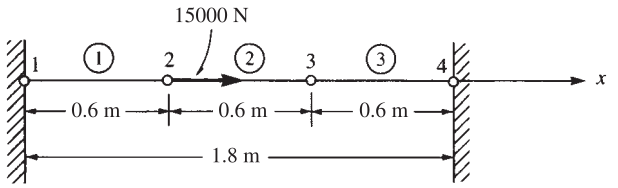

In [1]:
from mnspy import Nodo, Barra, Ensamble

### Paso 1: Definición de los Nodos
Se crean los nodos del sistema, especificando su coordenada y sus condiciones de frontera.
- `{'x': False}`: Desplazamiento restringido (apoyo fijo).
- `{'x': True}`: Desplazamiento libre.

In [2]:
n_1= Nodo('1', 0,grados_libertad={'x': False})
n_2= Nodo('2', 0.6,grados_libertad={'x': True})
n_3= Nodo('3', 1.2,grados_libertad={'x': True})
n_4= Nodo('4', 1.8,grados_libertad={'x': False})

In [3]:
print("Nodo 1 (ejemplo):")
n_1

Nodo 1 (ejemplo):


Nodo: 1

### Paso 2: Definición de los Elementos (Barras)
 
Se crean los elementos tipo `Barra`, especificando su ID, los nodos que conecta, el área de su sección transversal `A` y su Módulo de Young `E`.

In [4]:
e_1 = Barra('1',n_1,n_2, A=6E-4, E=2E11)
e_2 = Barra('2',n_2,n_3, A=6E-4, E=2E11)
e_3 = Barra('3',n_3,n_4, A=12E-4, E=1E11)

### Paso 3: Aplicación de Cargas Externas
Se aplica la fuerza externa de $15000\,N$ en el nodo $2$.

In [5]:
n_2.agregar_fuerza_externa(15000,'x')

### Paso 4: Matrices de Rigidez de los Elementos

Cada elemento `Barra` calcula su propia matriz de rigidez local a partir de sus propiedades.

In [6]:
e_1

Barra: 1

In [7]:
e_2

Barra: 2

In [8]:
e_3

Barra: 3

### Paso 5: Ensamble del Sistema y Diagrama
Se crea un objeto `Ensamble` que agrupa todos los elementos.

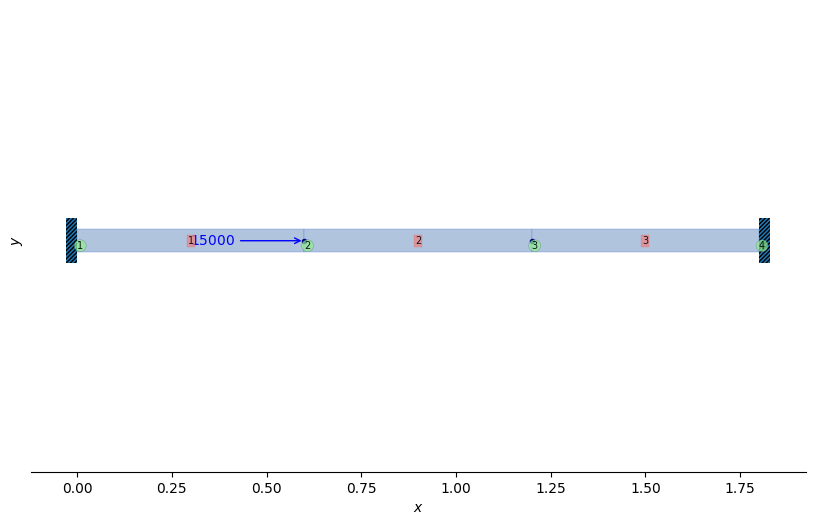

In [9]:
mg = Ensamble([e_1, e_2, e_3])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global
El ensamble construye la matriz de rigidez global del sistema completo.

In [10]:
mg

### Paso 7: Matriz de Rigidez Global Reducida

Esta es la matriz de rigidez que corresponde únicamente a los grados de libertad desconocidos (desplazamientos en los nodos $2$ y $3$). 

In [11]:
mg.matriz_global_reducida()

<IPython.core.display.Math object>

### Paso 8: Solución del Sistema

Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos desconocidos y luego se calculan las fuerzas de reacción.

In [12]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos calculados.
mg.solucion()

Desplazamientos,Reacciones
$u_{1}=0$,$\color{blue}F_{1x}=-10000$
$\color{blue}u_{2}=5 \times 10^{-5}$,$\cancel{F_{2x}}$
$\color{blue}u_{3}=2.5 \times 10^{-5}$,$\cancel{F_{3x}}$
$u_{4}=0$,$\color{blue}F_{4x}=-5000$


### Paso 9: Post-procesamiento (Fuerzas y Esfuerzos Internos)
Una vez conocidos los desplazamientos nodales, se puede calcular la fuerza y el esfuerzo normal ($\sigma = F/A$) en cada barra.

In [13]:
e_1.fuerzas_internas()

,Fuerzas internas
$f^{(1)}_{1x}$,-10000
$f^{(1)}_{2x}$,10000


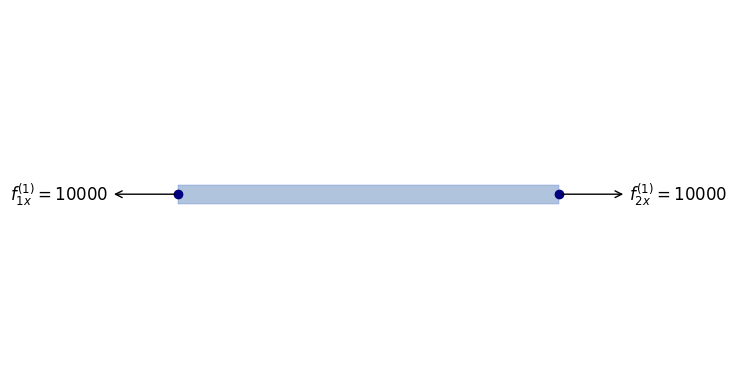

In [14]:
e_1.diagrama_fuerzas_internas()

In [15]:
e_2.fuerzas_internas()

,Fuerzas internas
$f^{(2)}_{2x}$,5000
$f^{(2)}_{3x}$,-5000


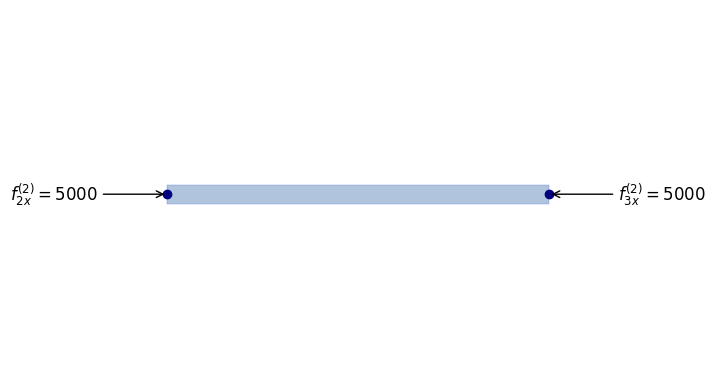

In [16]:
e_2.diagrama_fuerzas_internas()

In [17]:
e_3.fuerzas_internas()

,Fuerzas internas
$f^{(3)}_{3x}$,5000
$f^{(3)}_{4x}$,-5000


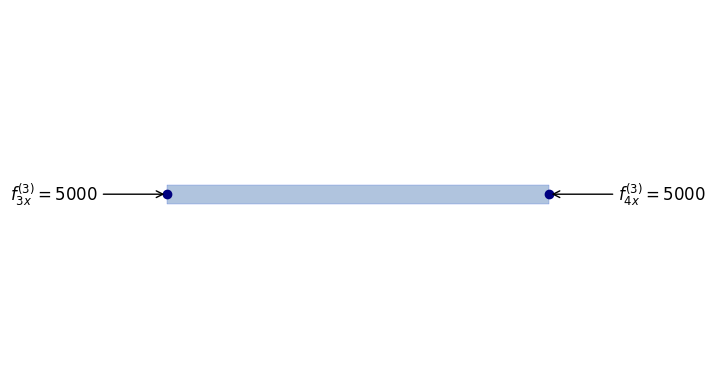

In [18]:
e_3.diagrama_fuerzas_internas()